In [1]:
import sys
import os

file_path = globals()['_dh'][0]
sys.path.append(os.path.abspath(os.path.join(file_path, "../..")))

import numpy as np
from model_equations import Model
from miniature_octo_chainsaw.logging_ import logger
from miniature_octo_chainsaw.preprocessing.preprocess_data import DataPreprocessor
from miniature_octo_chainsaw.parameter_estimation.initial_guess import InitialGuessGenerator
from miniature_octo_chainsaw.parameter_estimation.parameter_estimator import ParameterEstimator
from miniature_octo_chainsaw.parameter_estimation.results import save_results_as_pickle

logger.setLevel("DEBUG")

[10-11 18:10:00] {yaml_parser:128} INFO - Model specifications not loaded yet. Parsing now.
[10-11 18:10:00] {yaml_parser:38} INFO - Parsing model specifications.
[10-11 18:10:00] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\neuron/model_specifications.yaml
[10-11 18:10:00] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-11 18:10:00] {yaml_parser:132} INFO - Meta parameters not loaded yet. Parsing now.
[10-11 18:10:00] {yaml_parser:49} INFO - Parsing meta parameters.
[10-11 18:10:00] {yaml_parser:18} INFO - Loading YAML file: c:\Users\hridy\Documents\uni-heidelberg\software\miniature-octo-chainsaw\examples\neuron/meta_parameters.yaml
[10-11 18:10:00] {yaml_parser:21} INFO - Successfully loaded YAML file.
[10-11 18:10:00] {base_model:69} INFO - True model parameters: {'b': 3.3, 'I': 5, 'mu': 0.01, 's': 4, 'x_rest': -1.6}
[10-11 18:10:00] {base_model:70} INFO - Parameter guess initialization: {'b':

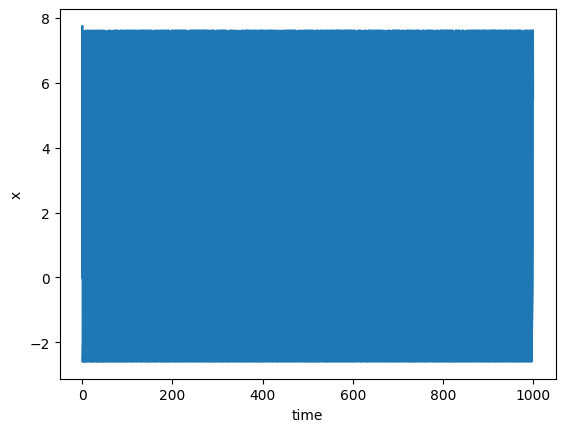

[10-11 18:10:03] {steady_state:45} DEBUG - Model equations were integrated upto time 1000.0.
[10-11 18:10:03] {steady_state:46} DEBUG - Steady state estimation from integration: [  5.48815433 -93.32836407  -0.69493354]
[10-11 18:10:03] {steady_state:50} DEBUG - Solve model equations using scipy to get steady state.
[10-11 18:10:03] {steady_state:62} DEBUG - Steady state found: {'x': np.float64(3.048722668916611), 'y': np.float64(-45.473549559830126), 'z': np.float64(12.761694132653036)}
[10-11 18:10:03] {initial_guess:27} INFO - Step 2: Continue the steady state to draw a bifurcation diagram.
[10-11 18:10:03] {deflated_continuation:117} DEBUG - Deflating at parameter value: 7.873554327647629.
[10-11 18:10:03] {deflated_continuation:133} DEBUG - Found 1 solutions at parameter value: 7.873554327647629.
[10-11 18:10:03] {deflated_continuation:149} DEBUG - Continued 1 solutions to parameter value: 7.973554327647629.
[10-11 18:10:03] {deflated_continuation:117} DEBUG - Deflating at paramete

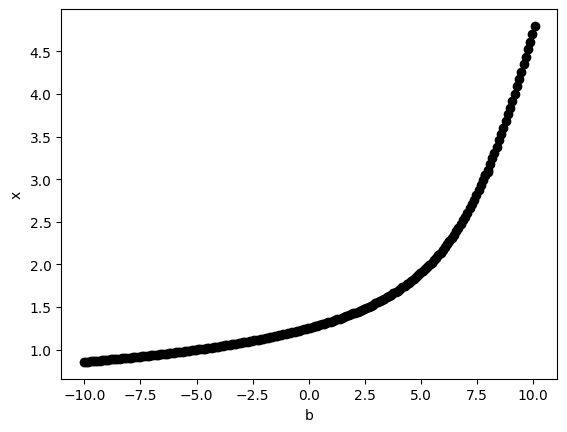

[10-11 18:10:09] {deflated_continuation:502} INFO - A bifurcation was detected near b = 2.5735543276476416.
[10-11 18:10:09] {bifurcation_point:100} DEBUG - Get the bifurcation point near 2.5735543276476416 using scipy optimizer.
[10-11 18:10:09] {bifurcation_point:113} WARNING - Objective function is satisfied only upto 2.864e-05
[10-11 18:10:09] {bifurcation_point:115} INFO - Found a bifurcation point at 2.5709698261130733.
[10-11 18:10:09] {initial_guess:32} INFO - Step 3: Trace a two-parameter bifurcation diagram along the data.
[10-11 18:10:09] {pseudo_arclength:137} DEBUG - Continued solution to parameter value: 2.5738363607051395 in forward direction.
[10-11 18:10:09] {pseudo_arclength:137} DEBUG - Continued solution to parameter value: 2.5795872677491696 in forward direction.
[10-11 18:10:09] {pseudo_arclength:137} DEBUG - Continued solution to parameter value: 2.59107000222788 in forward direction.
[10-11 18:10:09] {pseudo_arclength:137} DEBUG - Continued solution to parameter

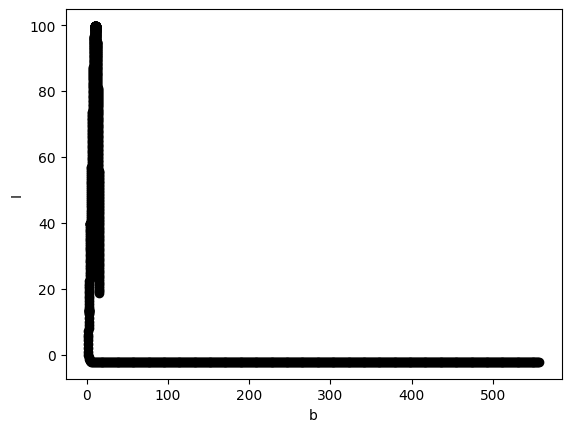

[10-11 18:10:40] {initial_guess:37} INFO - Step 5: Match the predicted points to experimental data.
[10-11 18:10:40] {initial_guess:43} INFO - Step 6: Append global parameters to the initial guess.


In [2]:
# Load the model and randomize the parameters
model = Model()
model.generate_parameter_guesses()

# Preprocess the data
data_preprocessor = DataPreprocessor()
data_preprocessor.load_the_data(file_path=os.path.join(file_path))
data_preprocessor.add_noise_to_the_data(scale=model.data_noise)
data_preprocessor.select_subset_of_data(length=25)
model.data = data_preprocessor.data

# Generate initial guesses for the parameter estimation
initializer = InitialGuessGenerator(model=model)

[10-11 18:10:40] {parameter_estimator:75} INFO - Estimate the model parameters using osqp solver.
c:\Users\hridy\Documents\uni-heidelberg\software\venv\Lib\site-packages\osqp\utils.py:118: UserWarning: Converting sparse P to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse P to a CSC " +
c:\Users\hridy\Documents\uni-heidelberg\software\venv\Lib\site-packages\osqp\utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -6.3146e+00   9.42e-03   8.33e-01   1.00e-01   2.35e-04s
  25  -9.5445e+00   1.73e-07   3.95e-06   1.00e-01   3.64e-04s

status:               solved
number of itera

[10-11 18:10:50] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 30!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.3364e+00   5.68e-02   5.84e+00   1.00e-01   2.10e-04s
  50  -2.2995e+00   2.42e-09   4.45e-07   1.19e+01   4.59e-04s

status:               solved
number of itera

[10-11 18:10:58] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 52!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0488e+00   6.62e-01   1.54e+01   1.00e-01   1.81e-04s
  50  -6.5502e-01   4.88e-04   3.15e-09   2.42e+00   3.89e-04s

status:               solved
number of itera

[10-11 18:10:58] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 53!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0487e+00   6.62e-01   1.54e+01   1.00e-01   1.95e-04s
  50  -6.5535e-01   4.95e-04   3.20e-09   2.42e+00   4.16e-04s

status:               solved
number of itera

[10-11 18:10:58] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 54!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0486e+00   6.62e-01   1.54e+01   1.00e-01   2.04e-04s
  50  -6.5568e-01   5.02e-04   3.22e-09   2.42e+00   4.47e-04s

status:               solved
number of itera

[10-11 18:10:59] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 55!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0486e+00   6.62e-01   1.54e+01   1.00e-01   2.02e-04s
  50  -6.5602e-01   5.09e-04   3.27e-09   2.42e+00   4.41e-04s

status:               solved
number of itera

[10-11 18:10:59] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 56!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0485e+00   6.62e-01   1.54e+01   1.00e-01   2.05e-04s
  50  -6.5636e-01   5.16e-04   3.32e-09   2.42e+00   4.54e-04s

status:               solved
number of itera

[10-11 18:10:59] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 57!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0484e+00   6.62e-01   1.54e+01   1.00e-01   1.79e-04s
  50  -6.5671e-01   5.23e-04   3.39e-09   2.42e+00   3.83e-04s

status:               solved
number of itera

[10-11 18:10:59] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 58!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0483e+00   6.62e-01   1.54e+01   1.00e-01   2.00e-04s
  50  -6.5706e-01   5.31e-04   3.44e-09   2.41e+00   4.29e-04s

status:               solved
number of itera

[10-11 18:11:00] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 59!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0482e+00   6.62e-01   1.54e+01   1.00e-01   1.79e-04s
  50  -6.5741e-01   5.38e-04   3.47e-09   2.41e+00   3.85e-04s

status:               solved
number of itera

[10-11 18:11:00] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 60!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0482e+00   6.62e-01   1.54e+01   1.00e-01   1.82e-04s
  50  -6.5777e-01   5.46e-04   3.49e-09   2.41e+00   3.94e-04s

status:               solved
number of itera

[10-11 18:11:00] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 61!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0481e+00   6.62e-01   1.54e+01   1.00e-01   1.92e-04s
  50  -6.5814e-01   5.53e-04   3.54e-09   2.41e+00   4.17e-04s

status:               solved
number of itera

[10-11 18:11:01] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 62!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0480e+00   6.62e-01   1.54e+01   1.00e-01   2.26e-04s
  50  -6.5851e-01   5.61e-04   3.60e-09   2.41e+00   4.81e-04s

status:               solved
number of itera

[10-11 18:11:01] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 63!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0479e+00   6.62e-01   1.54e+01   1.00e-01   1.89e-04s
  50  -6.5888e-01   5.69e-04   3.61e-09   2.40e+00   4.07e-04s

status:               solved
number of itera

[10-11 18:11:01] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 64!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0479e+00   6.62e-01   1.54e+01   1.00e-01   1.76e-04s
  50  -6.5927e-01   5.77e-04   3.68e-09   2.40e+00   4.05e-04s

status:               solved
number of itera

[10-11 18:11:02] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 65!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0478e+00   6.62e-01   1.54e+01   1.00e-01   1.85e-04s
  50  -6.5965e-01   5.85e-04   3.72e-09   2.40e+00   4.04e-04s

status:               solved
number of itera

[10-11 18:11:02] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 66!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0477e+00   6.62e-01   1.54e+01   1.00e-01   2.01e-04s
  50  -6.6004e-01   5.93e-04   3.79e-09   2.40e+00   4.43e-04s

status:               solved
number of itera

[10-11 18:11:02] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 67!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0476e+00   6.62e-01   1.54e+01   1.00e-01   1.92e-04s
  50  -6.6044e-01   6.01e-04   3.81e-09   2.40e+00   4.17e-04s

status:               solved
number of itera

[10-11 18:11:03] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 68!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0475e+00   6.62e-01   1.54e+01   1.00e-01   2.14e-04s
  50  -6.6084e-01   6.09e-04   3.89e-09   2.39e+00   4.50e-04s

status:               solved
number of itera

[10-11 18:11:03] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 69!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0475e+00   6.62e-01   1.54e+01   1.00e-01   2.17e-04s
  50  -6.6125e-01   6.18e-04   3.93e-09   2.39e+00   4.74e-04s

status:               solved
number of itera

[10-11 18:11:03] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 70!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0474e+00   6.62e-01   1.54e+01   1.00e-01   1.81e-04s
  50  -6.6166e-01   6.26e-04   3.99e-09   2.39e+00   3.92e-04s

status:               solved
number of itera

[10-11 18:11:04] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 71!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0473e+00   6.62e-01   1.54e+01   1.00e-01   1.91e-04s
  50  -6.6208e-01   6.35e-04   4.03e-09   2.39e+00   4.13e-04s

status:               solved
number of itera

[10-11 18:11:04] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 72!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0472e+00   6.62e-01   1.54e+01   1.00e-01   1.97e-04s
  50  -6.6250e-01   6.44e-04   4.08e-09   2.39e+00   4.25e-04s

status:               solved
number of itera

[10-11 18:11:04] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 73!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0471e+00   6.62e-01   1.54e+01   1.00e-01   2.32e-04s
  50  -6.6293e-01   6.53e-04   4.13e-09   2.38e+00   4.96e-04s

status:               solved
number of itera

[10-11 18:11:05] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 74!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0471e+00   6.62e-01   1.54e+01   1.00e-01   2.16e-04s
  50  -6.6337e-01   6.62e-04   4.17e-09   2.38e+00   4.74e-04s

status:               solved
number of itera

[10-11 18:11:05] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 75!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0470e+00   6.62e-01   1.54e+01   1.00e-01   1.89e-04s
  50  -6.6381e-01   6.71e-04   4.23e-09   2.38e+00   4.15e-04s

status:               solved
number of itera

[10-11 18:11:05] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 76!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0469e+00   6.62e-01   1.54e+01   1.00e-01   1.84e-04s
  50  -6.6426e-01   6.80e-04   4.29e-09   2.38e+00   4.08e-04s

status:               solved
number of itera

[10-11 18:11:05] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 77!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0468e+00   6.62e-01   1.54e+01   1.00e-01   1.79e-04s
  50  -6.6471e-01   6.90e-04   4.33e-09   2.38e+00   3.89e-04s

status:               solved
number of itera

[10-11 18:11:06] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 78!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0467e+00   6.62e-01   1.54e+01   1.00e-01   1.90e-04s
  50  -6.6517e-01   6.99e-04   4.41e-09   2.37e+00   4.08e-04s

status:               solved
number of itera

[10-11 18:11:06] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 79!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0467e+00   6.62e-01   1.54e+01   1.00e-01   1.92e-04s
  50  -6.6564e-01   7.09e-04   4.47e-09   2.37e+00   4.06e-04s

status:               solved
number of itera

[10-11 18:11:06] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 80!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0466e+00   6.62e-01   1.54e+01   1.00e-01   1.74e-04s
  50  -6.6611e-01   7.19e-04   4.52e-09   2.37e+00   3.88e-04s

status:               solved
number of itera

[10-11 18:11:07] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 81!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0465e+00   6.62e-01   1.54e+01   1.00e-01   1.97e-04s
  50  -6.6659e-01   7.29e-04   4.57e-09   2.37e+00   4.27e-04s

status:               solved
number of itera

[10-11 18:11:07] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 82!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0464e+00   6.62e-01   1.54e+01   1.00e-01   2.02e-04s
  50  -6.6707e-01   7.39e-04   4.64e-09   2.37e+00   4.40e-04s

status:               solved
number of itera

[10-11 18:11:07] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 83!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0463e+00   6.62e-01   1.54e+01   1.00e-01   1.90e-04s
  50  -6.6756e-01   7.49e-04   4.69e-09   2.36e+00   4.40e-04s

status:               solved
number of itera

[10-11 18:11:08] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 84!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0463e+00   6.62e-01   1.54e+01   1.00e-01   1.88e-04s
  50  -6.6806e-01   7.59e-04   4.77e-09   2.36e+00   4.01e-04s

status:               solved
number of itera

[10-11 18:11:08] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 85!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0462e+00   6.62e-01   1.54e+01   1.00e-01   1.84e-04s
  50  -6.6857e-01   7.70e-04   4.81e-09   2.36e+00   4.00e-04s

status:               solved
number of itera

[10-11 18:11:08] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 86!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0461e+00   6.62e-01   1.54e+01   1.00e-01   2.13e-04s
  50  -6.6908e-01   7.80e-04   4.89e-09   2.36e+00   4.70e-04s

status:               solved
number of itera

[10-11 18:11:09] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 87!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0460e+00   6.61e-01   1.54e+01   1.00e-01   1.88e-04s
  50  -6.6957e-01   7.91e-04   4.91e-09   2.36e+00   4.03e-04s

status:               solved
number of itera

[10-11 18:11:09] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 88!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0459e+00   6.61e-01   1.54e+01   1.00e-01   1.80e-04s
  50  -6.7006e-01   8.01e-04   4.98e-09   2.35e+00   3.87e-04s

status:               solved
number of itera

[10-11 18:11:09] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 89!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0459e+00   6.61e-01   1.54e+01   1.00e-01   2.07e-04s
  50  -6.7056e-01   8.11e-04   5.04e-09   2.35e+00   6.60e-04s

status:               solved
number of itera

[10-11 18:11:10] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 90!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0458e+00   6.61e-01   1.54e+01   1.00e-01   1.84e-04s
  50  -6.7107e-01   8.22e-04   5.11e-09   2.35e+00   3.96e-04s

status:               solved
number of itera

[10-11 18:11:10] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 91!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0457e+00   6.61e-01   1.54e+01   1.00e-01   2.06e-04s
  50  -6.7159e-01   8.33e-04   5.19e-09   2.35e+00   4.48e-04s

status:               solved
number of itera

[10-11 18:11:10] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 92!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0456e+00   6.61e-01   1.54e+01   1.00e-01   2.00e-04s
  50  -6.7211e-01   8.44e-04   5.25e-09   2.35e+00   4.32e-04s

status:               solved
number of itera

[10-11 18:11:10] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 93!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0456e+00   6.61e-01   1.54e+01   1.00e-01   1.76e-04s
  50  -6.7264e-01   8.54e-04   5.29e-09   2.34e+00   3.82e-04s

status:               solved
number of itera

[10-11 18:11:11] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 94!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0455e+00   6.61e-01   1.54e+01   1.00e-01   1.93e-04s
  50  -6.7317e-01   8.66e-04   5.39e-09   2.34e+00   4.15e-04s

status:               solved
number of itera

[10-11 18:11:11] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 95!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0454e+00   6.61e-01   1.54e+01   1.00e-01   1.87e-04s
  50  -6.7371e-01   8.77e-04   5.41e-09   2.34e+00   4.10e-04s

status:               solved
number of itera

[10-11 18:11:11] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 96!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0453e+00   6.61e-01   1.54e+01   1.00e-01   1.98e-04s
  50  -6.7426e-01   8.88e-04   5.47e-09   2.34e+00   4.25e-04s

status:               solved
number of itera

[10-11 18:11:12] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 97!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0453e+00   6.61e-01   1.54e+01   1.00e-01   2.58e-04s
  50  -6.7481e-01   9.00e-04   5.56e-09   2.34e+00   7.51e-04s

status:               solved
number of itera

[10-11 18:11:12] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 98!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0452e+00   6.61e-01   1.54e+01   1.00e-01   2.07e-04s
  50  -6.7537e-01   9.12e-04   5.62e-09   2.33e+00   5.91e-04s

status:               solved
number of itera

[10-11 18:11:12] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 99!
[10-11 18:11:12] {base_optimizer:75} WARNING - Maximum number of iterations reached!


-----------------------------------------------------------------
           OSQP v0.6.3  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 122, constraints m = 110
          nnz(P) + nnz(A) = 590
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.0725e+00   6.65e-01   1.54e+01   1.00e-01   1.81e-04s
  50  -4.5651e-01   1.34e-03   3.03e-06   2.40e+00   3.86e-04s

status:               solved
number of itera

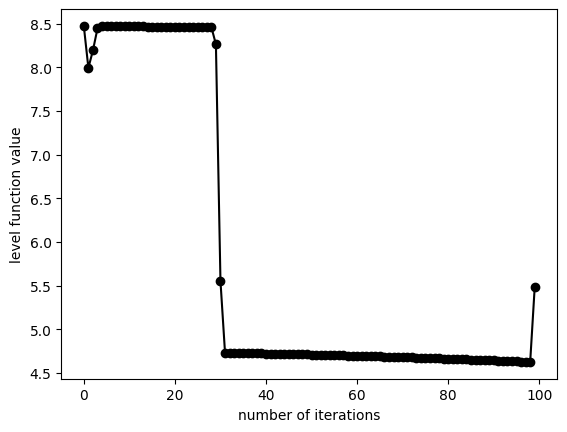

Function __run_solver took 32.832 seconds.


In [3]:
# Solve parameter estimation problem
fit_osqp = ParameterEstimator(
    x0=initializer.initial_guesses,
    model=model,
    method="osqp",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

[10-11 18:11:13] {parameter_estimator:75} INFO - Estimate the model parameters using gauss-newton solver.
[10-11 18:11:35] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 54!
[10-11 18:11:35] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 55!
[10-11 18:11:36] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 56!
[10-11 18:11:36] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 57!
[10-11 18:11:37] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 58!
[10-11 18:11:37] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 59!
[10-11 18:11:37] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 60!
[10-11 18:11:38] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 61!
[10-11 18:11:38] {base_optimizer:48} WARNING - Positive definiteness does not hold in iterate 62!
[10-11 18:11

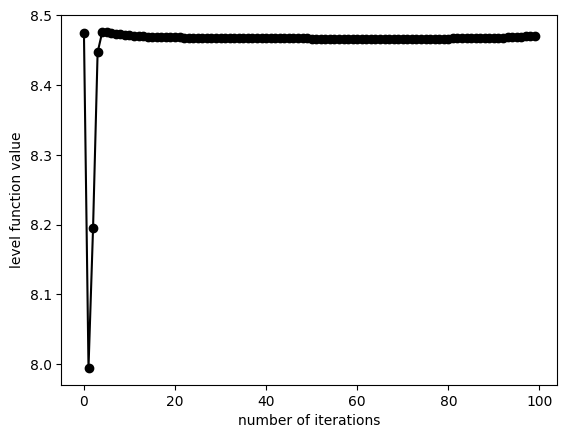

Function __run_solver took 40.531 seconds.


In [4]:
fit_gn = ParameterEstimator(
    x0=initializer.initial_guesses,
    model=model,
    method="gauss-newton",
    plot_iters=True,
    compute_ci=True,
    timer=True,
)

In [5]:
np.diag(fit_osqp.result.covariance_matrix)[:20]

array([1.97378261e-02, 2.72220197e-02, 1.26856723e+00, 2.05069647e+01,
       1.29222897e+00, 1.43181876e-01, 5.93389981e-02, 1.71945374e-03,
       2.65214635e-01, 1.58149377e-01, 2.94700092e-02, 2.39633183e+00,
       2.00598604e-02, 2.74933304e-02, 1.27379868e+00, 2.05054467e+01,
       1.29722041e+00, 1.46621158e-01, 6.13808239e-02, 1.72134307e-03])

In [6]:
np.diag(fit_gn.result.covariance_matrix)[:20]

array([1.39602741e-02, 2.01095051e-02, 1.30284984e+00, 2.05069052e+01,
       1.32341517e+00, 9.02188308e-02, 3.03273570e-02, 1.18802369e-03,
       2.42166609e-01, 1.44259222e-01, 1.88289844e-02, 2.19549524e+00,
       1.43640160e-02, 2.03411839e-02, 1.31440504e+00, 2.05055447e+01,
       1.33454838e+00, 9.51494221e-02, 3.30378427e-02, 1.19407914e-03])

In [7]:
fit_gn.result.x[:10]

array([ 1.20020280e-01,  9.30975358e-01,  1.06581258e+00,  4.43268023e+00,
        7.49642650e-02,  6.52424090e-01, -7.46992814e-01,  1.19726325e-03,
        1.50332020e-01,  1.36601841e-01])

In [8]:
fit_osqp.result.x[:10]

array([ 1.17438505e-01,  9.32065192e-01,  2.27395802e+00,  4.46624969e+00,
        1.28267261e+00,  6.61335497e-01, -7.30555517e-01,  4.50404181e-04,
        1.42712462e-01,  1.31124141e-01])

In [9]:
i = 6
print(initializer.initial_guesses[i * 12: (i + 1) * 12])
print(initializer.model.data[i])

[ 1.67580203e+00 -1.30415623e+01  6.51348459e+00  2.81121718e+00
  1.63664463e+01  6.13994071e-02 -9.71244806e-01  2.62948356e-03
  2.29555442e-01  1.45099744e-02 -6.96228170e-04  3.97572756e+00]
{'b': np.float64(2.811217181162185), 'I': np.float64(5.2206711615585615)}
